<a href="https://colab.research.google.com/github/fguedes-datascience/portfolio/blob/main/Previs%C3%A3o_ScoreCredito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PREVISÃO DE DO ESCORE DE CRÉDITOS COM REGRESSÃO LINEAR**
### Modelo preditivo de machhine learning para prever o escre decrédito do cliente

In [1]:
#Importar pacotes que iremos utilizar

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#Warning possui detalhe


In [2]:
#O pacote warnings em Python é usado para lidar com mensagens de aviso (warnings) emitidas pelo interpretador Python durante a execução de um programa.
#Warnings são alertas sobre possíveis problemas ou práticas desencorajadas no código, mas não são erros que impedem a execução do programa.
#Usaremos o warnings.filterwarnings() para suprimir avisos específicos ou todos os avisos durante a execução do programa.
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Importar pacotes de machine learning
from sklearn.model_selection import train_test_split # Dividir um conjunto de dados em duas partes:dados de treino e teste
from sklearn.preprocessing import StandardScaler # Utilizado para fazer a normalização dos dados
from sklearn.preprocessing import MinMaxScaler # Utilizado para fazer a normalização dos dados
from sklearn.preprocessing import LabelEncoder # Utilkizado para fazer o OneHotEncoding
from sklearn.linear_model import LinearRegression # Algoritmo de Regressão Linear
from sklearn.metrics import r2_score # Utilizado para medir a acuracio do modelo preditivo

In [4]:
#Comando para exibir toas colunas do arquivo
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## **Importação de dados para Análise Exploratória e Tratamento de Dados**

In [5]:
#Carregando arquivo como um DataFrame do Pandas
df_dados = pd.read_excel('/content/drive/MyDrive/Colab Datasets/Previsao ScoreCredito/dados_credito.xlsx')

In [6]:
#Verificando quantidade de linhas e colunas do dataframe
df_dados.shape

(10476, 17)

In [7]:
#Verificar as 5 primeiras linha do dataframe
df_dados.head()

,CODIGO_CLIENTE,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
0,1,SP,19,Superior Cursando,Solteiro,0,Não,0,0,Não,0,8,Sim,1800,0,0,12.000000
1,2,MG,23,Superior Completo,Solteiro,1,Não,0,0,Não,0,9,Não,4800,1,50000,18.000000
2,3,SC,25,Segundo Grau Completo,Casado,0,Sim,1,220000,Não,0,18,Sim,2200,2,30000,23.000000
3,4,PR,27,Superior Cursando,Casado,1,Sim,0,0,Não,0,22,Não,3900,0,0,28.666667
4,5,RJ,28,Superior Completo,Divorciado,2,Não,1,370000,Não,0,30,Sim,NaN,1,35000,34.166667


In [8]:
#Verificar as 5 ultimas linhas do Dataframe
df_dados.tail()

,CODIGO_CLIENTE,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
10471,10472,PR,51,Superior Completo,Solteiro,1,Não,0,0,Não,0,9,Não,4800,1,50000,18.000000
10472,10473,SP,48,Segundo Grau Completo,Casado,0,Sim,1,220000,Não,0,18,Sim,2200,2,30000,23.000000
10473,10474,RJ,51,Superior Cursando,Casado,1,Sim,0,0,Não,0,22,Não,3900,0,0,28.666667
10474,10475,RJ,48,Superior Completo,Divorciado,2,Não,1,370000,Não,0,30,Sim,NaN,1,35000,34.166667
10475,10476,PR,51,Segundo Grau Completo,Divorciado,0,Não,0,0,Não,0,14,Sim,3100,2,40000,39.666667


In [9]:
#Verificando as informações do conjunto de dados
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10476 entries, 0 to 10475
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CODIGO_CLIENTE              10476 non-null  int64  
 1   UF                          10476 non-null  object 
 2   IDADE                       10476 non-null  int64  
 3   ESCOLARIDADE                10476 non-null  object 
 4   ESTADO_CIVIL                10476 non-null  object 
 5   QT_FILHOS                   10476 non-null  int64  
 6   CASA_PROPRIA                10476 non-null  object 
 7   QT_IMOVEIS                  10476 non-null  int64  
 8   VL_IMOVEIS                  10476 non-null  int64  
 9   OUTRA_RENDA                 10476 non-null  object 
 10  OUTRA_RENDA_VALOR           10476 non-null  int64  
 11  TEMPO_ULTIMO_EMPREGO_MESES  10476 non-null  int64  
 12  TRABALHANDO_ATUALMENTE      10476 non-null  object 
 13  ULTIMO_SALARIO              104

In [10]:
# A variavel CODIGO_CLIENTE para nosso modelo predito poderá ser excluida
# As variaveis UF, ESCOLARIDADE, CASA_PROPRIA, OUTRA_RENDA, TRABALHANDO_ATUALMENTE e ESTADO_CIVIL ---> oneHotEncoding(que transformara essas variaveis em numéricas )
# A variavel ULTIMO_SALARIO está como STRING e precisa ser NUMERICA

In [11]:
#Vamos excluir a variavel CODIGO_CLIENTE
df_dados.drop('CODIGO_CLIENTE', axis=1, inplace=True)

In [12]:
#Vamos agrupar os valores e verificar se há algum valor discrepante
df_dados.groupby(['ULTIMO_SALARIO']).size()

ULTIMO_SALARIO
1800         846
2200         792
3100         792
3900         792
4500         468
4800         792
5300         522
6100         522
6800         611
9000         522
9800         468
11500        790
13000        522
15000        522
17500        522
18300        522
22000        468
SEM DADOS      1
dtype: int64

In [13]:
#Vamos listar a linha que esta com a informação SEM DADOS
df_dados.loc[df_dados['ULTIMO_SALARIO'] == 'SEM DADOS']

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
10459,RJ,45,Superior Cursando,Solteiro,1,Sim,1,185000,Sim,3000,19,Sim,SEM DADOS,0,0,45.166667


In [14]:
#Agora substituiremos a palavra SEM VALOR por um valor NULO
df_dados.replace("SEM DADOS", np.nan, inplace=True)

In [15]:
#Agora converteremos a variável em FLOAT
df_dados['ULTIMO_SALARIO'] = df_dados['ULTIMO_SALARIO'].astype(np.float64)

In [16]:
#Verificaremos se existe alguma variável com valor NULO,MISSING OU NAN
df_dados.isnull().sum()

UF                            0
IDADE                         0
ESCOLARIDADE                  0
ESTADO_CIVIL                  0
QT_FILHOS                     0
CASA_PROPRIA                  0
QT_IMOVEIS                    0
VL_IMOVEIS                    0
OUTRA_RENDA                   0
OUTRA_RENDA_VALOR             0
TEMPO_ULTIMO_EMPREGO_MESES    0
TRABALHANDO_ATUALMENTE        0
ULTIMO_SALARIO                3
QT_CARROS                     0
VALOR_TABELA_CARROS           0
SCORE                         0
dtype: int64

In [17]:
#Substituiremos os valores NULOS da variável ULTIMO_SALARIO pela sua própria mediana
df_dados['ULTIMO_SALARIO'] = df_dados['ULTIMO_SALARIO'].fillna((df_dados['ULTIMO_SALARIO'].median()))

In [18]:
#Vamos verificar se ainda há valores nulos
df_dados.isnull().sum()

UF                            0
IDADE                         0
ESCOLARIDADE                  0
ESTADO_CIVIL                  0
QT_FILHOS                     0
CASA_PROPRIA                  0
QT_IMOVEIS                    0
VL_IMOVEIS                    0
OUTRA_RENDA                   0
OUTRA_RENDA_VALOR             0
TEMPO_ULTIMO_EMPREGO_MESES    0
TRABALHANDO_ATUALMENTE        0
ULTIMO_SALARIO                0
QT_CARROS                     0
VALOR_TABELA_CARROS           0
SCORE                         0
dtype: int64

In [19]:
#Vamos verificar novamente os tipos de variáveis
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10476 entries, 0 to 10475
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   UF                          10476 non-null  object 
 1   IDADE                       10476 non-null  int64  
 2   ESCOLARIDADE                10476 non-null  object 
 3   ESTADO_CIVIL                10476 non-null  object 
 4   QT_FILHOS                   10476 non-null  int64  
 5   CASA_PROPRIA                10476 non-null  object 
 6   QT_IMOVEIS                  10476 non-null  int64  
 7   VL_IMOVEIS                  10476 non-null  int64  
 8   OUTRA_RENDA                 10476 non-null  object 
 9   OUTRA_RENDA_VALOR           10476 non-null  int64  
 10  TEMPO_ULTIMO_EMPREGO_MESES  10476 non-null  int64  
 11  TRABALHANDO_ATUALMENTE      10476 non-null  object 
 12  ULTIMO_SALARIO              10476 non-null  float64
 13  QT_CARROS                   104

In [20]:
#Vamos avaliar algumas medidas estatiscas básicas
df_dados.describe()

,IDADE,QT_FILHOS,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
count,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000
mean,41.054124,1.122566,0.847079,238453.608247,641.237113,43.070447,8286.531119,0.936426,40996.563574,51.058706
std,13.878162,1.113537,0.957374,265843.934416,1295.978195,40.851521,5826.589775,0.806635,47404.214062,27.306340
min,19.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1800.000000,0.000000,0.000000,12.000000
25%,28.000000,0.000000,0.000000,0.000000,0.000000,14.000000,3900.000000,0.000000,0.000000,28.666667
50%,42.000000,1.000000,1.000000,185000.000000,0.000000,22.000000,6100.000000,1.000000,35000.000000,45.166667
75%,53.000000,2.000000,1.000000,370000.000000,0.000000,75.000000,11500.000000,2.000000,50000.000000,72.666667
max,65.000000,42.000000,3.000000,900000.000000,4000.000000,150.000000,22000.000000,2.000000,180000.000000,98.000000


In [21]:
#Verificaremos se existem outliers das colunas númericas
#Vamos carrega em uma lista as variáveis que são do tipo INT64 e FLOAT65
variaveis_numericas = []
for i in df_dados.columns[0:16].tolist():
  if df_dados.dtypes[i] == 'int64' or df_dados.dtypes[i] == 'float64':
    print(i, ';' , df_dados.dtypes[i])
    variaveis_numericas.append(i)

IDADE ; int64
QT_FILHOS ; int64
QT_IMOVEIS ; int64
VL_IMOVEIS ; int64
OUTRA_RENDA_VALOR ; int64
TEMPO_ULTIMO_EMPREGO_MESES ; int64
ULTIMO_SALARIO ; float64
QT_CARROS ; int64
VALOR_TABELA_CARROS ; int64
SCORE ; float64


In [22]:
#Obsevaremos nossa lista de variáveis númericas
variaveis_numericas

['IDADE',
 'QT_FILHOS',
 'QT_IMOVEIS',
 'VL_IMOVEIS',
 'OUTRA_RENDA_VALOR',
 'TEMPO_ULTIMO_EMPREGO_MESES',
 'ULTIMO_SALARIO',
 'QT_CARROS',
 'VALOR_TABELA_CARROS',
 'SCORE']

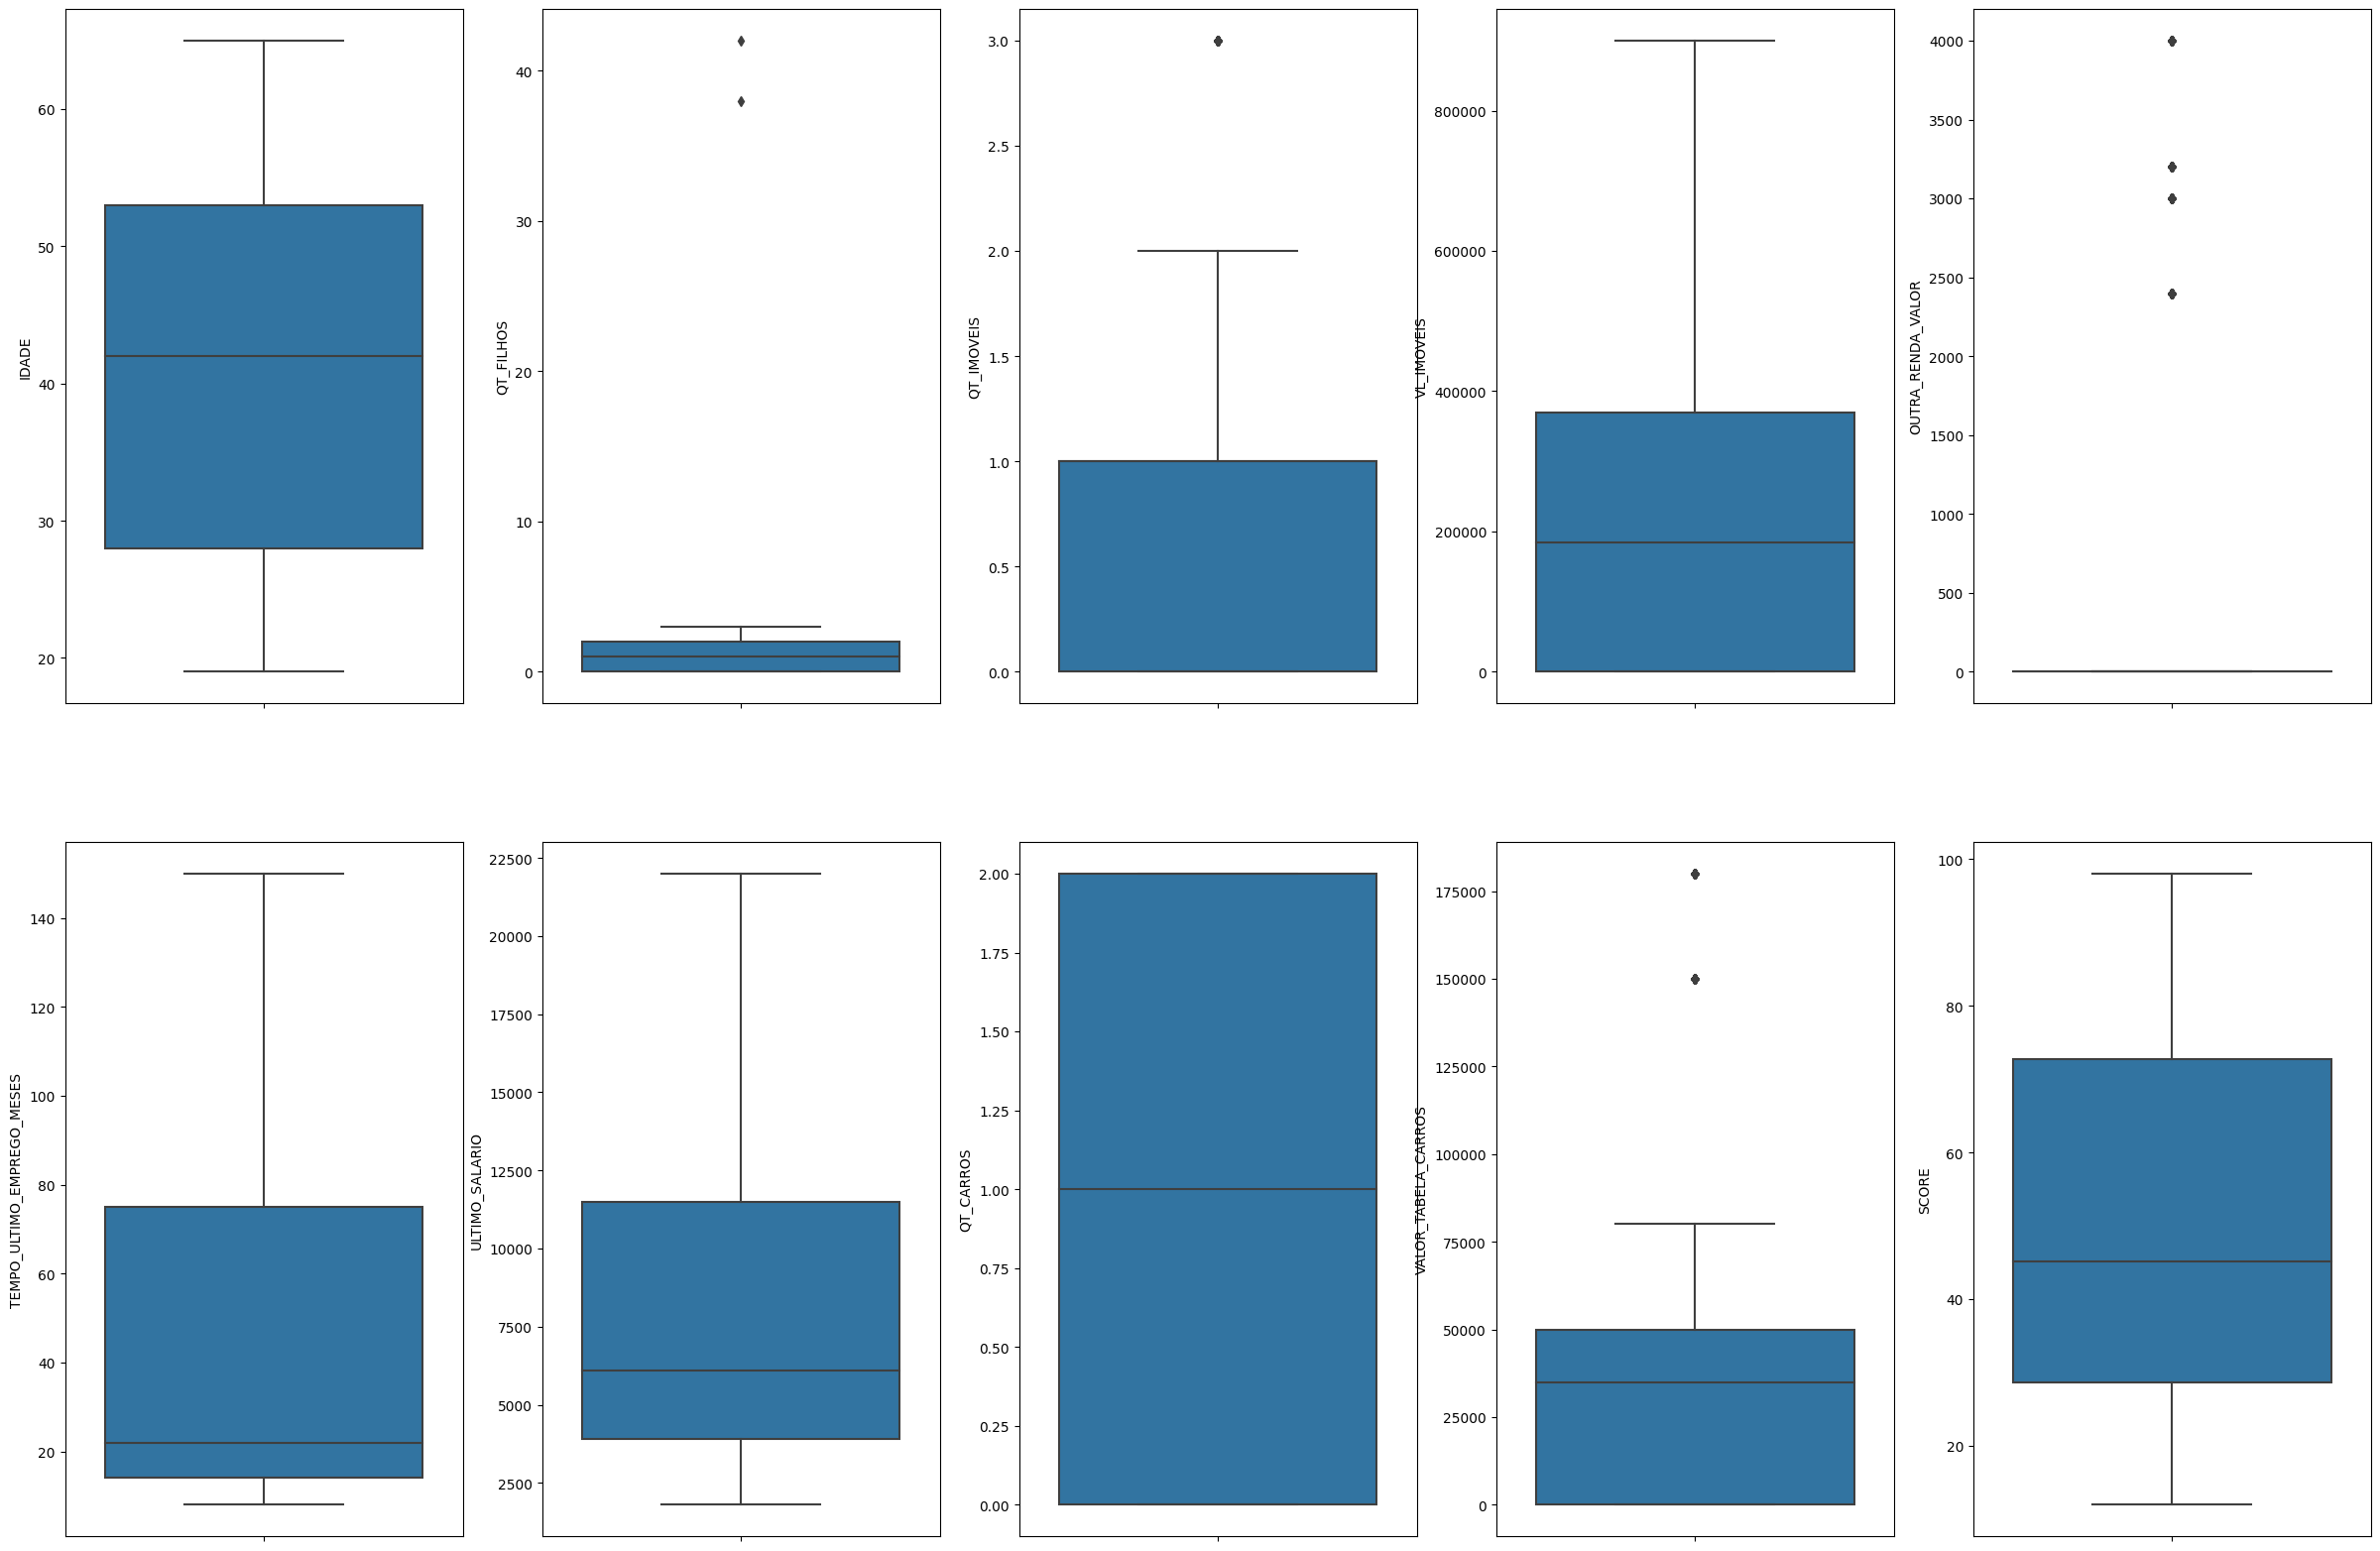

In [23]:
#Vamos agora exibir todos os gráficos de uma só vez para facilitar a analise.

#Tamanho da tela de exibição do grafico
plt.rcParams["figure.figsize"] = [30.00, 20.00]
plt.rcParams["figure.autolayout"]

#Definiremos as quantidades de linhas e colunas que exibiremos o gráfico
f, axes = plt.subplots(2, 5)

linha = 0
coluna = 0

for i in variaveis_numericas:
  sns.boxplot(data = df_dados, y=i, ax=axes[linha][coluna])
  coluna += 1
  if coluna ==5:
    linha += 1
    coluna = 0

plt.show()

In [24]:
#Verificamos possíveis OUTLIERS nas variáveis QT_FILHOS, QT_IMOVEIS, VALOR_TABELA_CARROS e OUTRA_RENDA_VALOR
#Vamos verificar quis desses são outiliers e avaliar como iremos trata-los

#Vamos listar a quantidades de filhos superiores a 4
df_dados.loc[df_dados['QT_FILHOS'] > 4]

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
27,SP,48,Superior Completo,Divorciado,38,Sim,2,600000,Não,0,15,Sim,15000.0,1,70000,67.166667
10455,SP,45,Segundo Grau Completo,Casado,42,Sim,1,220000,Não,0,18,Sim,2200.0,2,30000,23.000000


In [25]:
#Como temos somente 2 registros que realmente são outliers iremos exclui-los
df_dados.drop(df_dados.loc[df_dados['QT_FILHOS'] > 4].index, inplace=True)

In [ ]:
#Avaliaremos os outros possíves outliers

In [26]:
df_dados.groupby(['OUTRA_RENDA_VALOR']).size()

OUTRA_RENDA_VALOR
0       8350
2400     468
3000     612
3200     522
4000     522
dtype: int64

In [ ]:
# Nada precisaremos alterar

In [27]:
df_dados.groupby(['VALOR_TABELA_CARROS']).size()

VALOR_TABELA_CARROS
0         3762
28000      468
30000      791
35000      792
40000      792
48000      522
50000     1314
70000      521
80000      522
150000     468
180000     522
dtype: int64

In [ ]:
# Nada precisaremos alterar

In [28]:
df_dados.groupby(['QT_IMOVEIS']).size()

QT_IMOVEIS
0    4680
1    3761
2     989
3    1044
dtype: int64

In [ ]:
# Nada precisaremos alterar

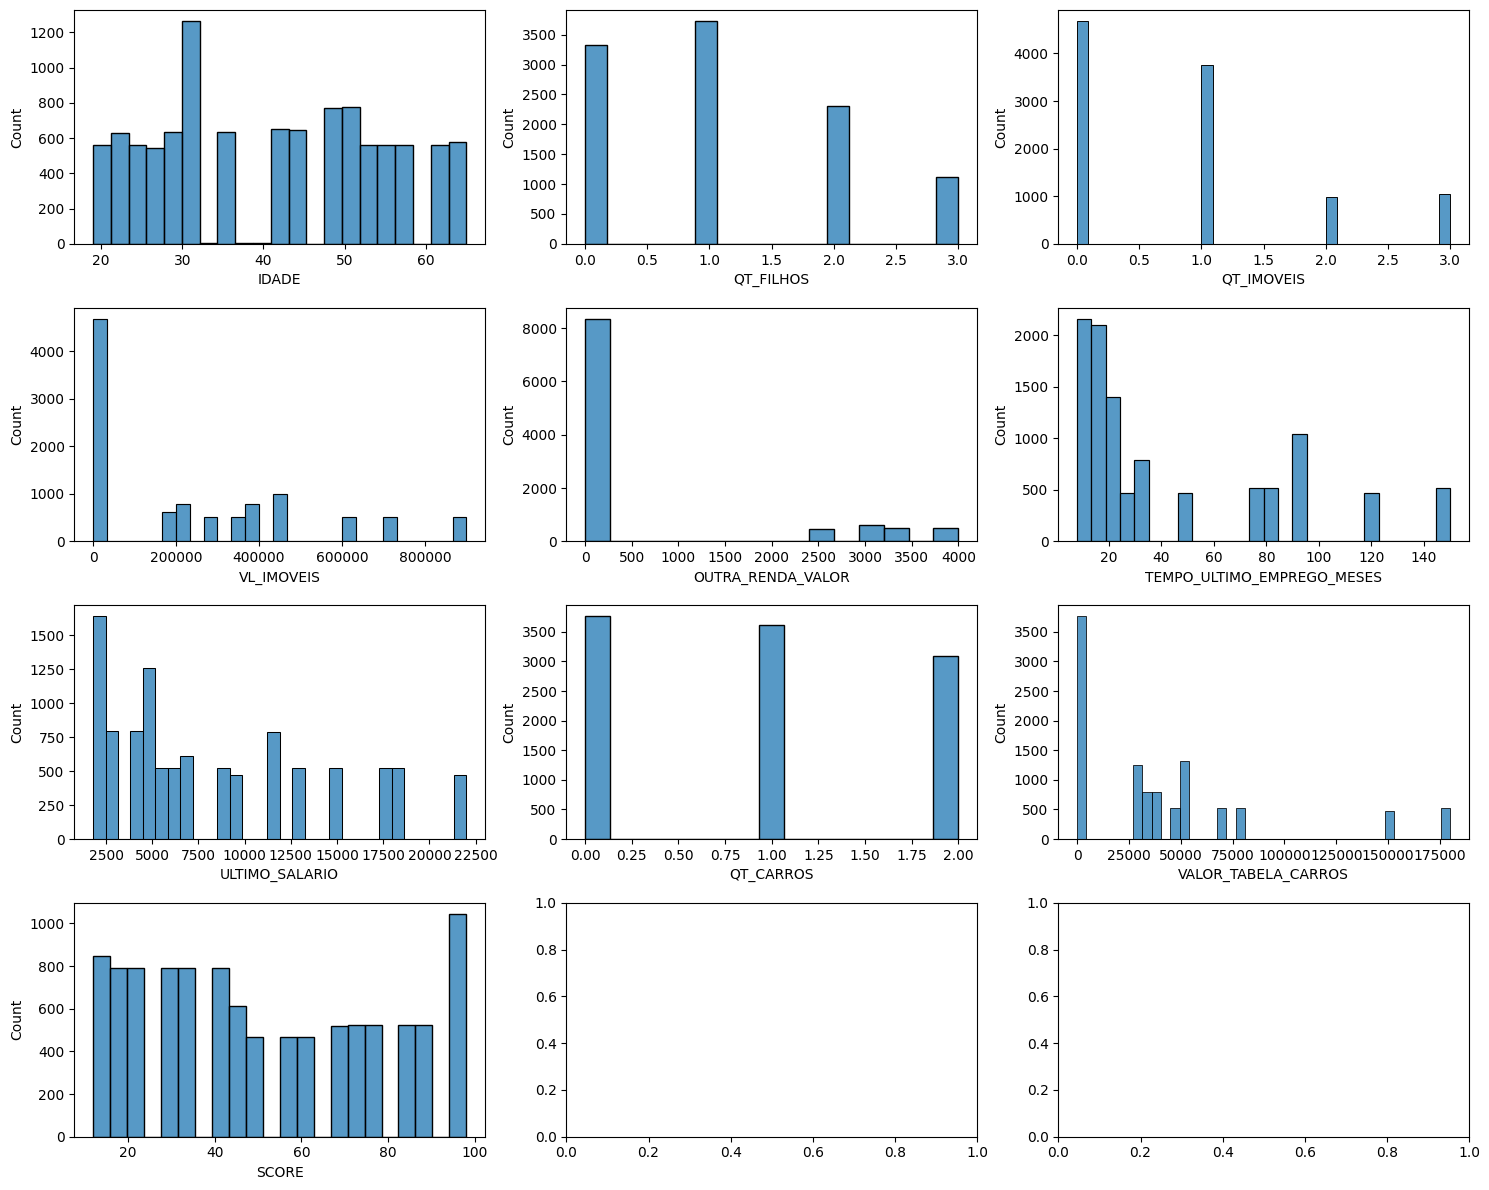

In [29]:
# Vamos gerar um histograma e avaliar a distribuição de dados
plt.rcParams["figure.figsize"] = [15.00, 12.00]
plt.rcParams["figure.autolayout"] = True

#Definiremos as quantidades de linhas e colunas que exibiremos o gráfico
f, axes = plt.subplots(4, 3)

linha = 0
coluna = 0

for i in variaveis_numericas:
  sns.histplot(data = df_dados, x=i, ax=axes[linha][coluna])
  coluna += 1
  if coluna ==3:
    linha += 1
    coluna = 0

plt.show()

In [ ]:
#Podemos observar que os dados estão bem dispersos

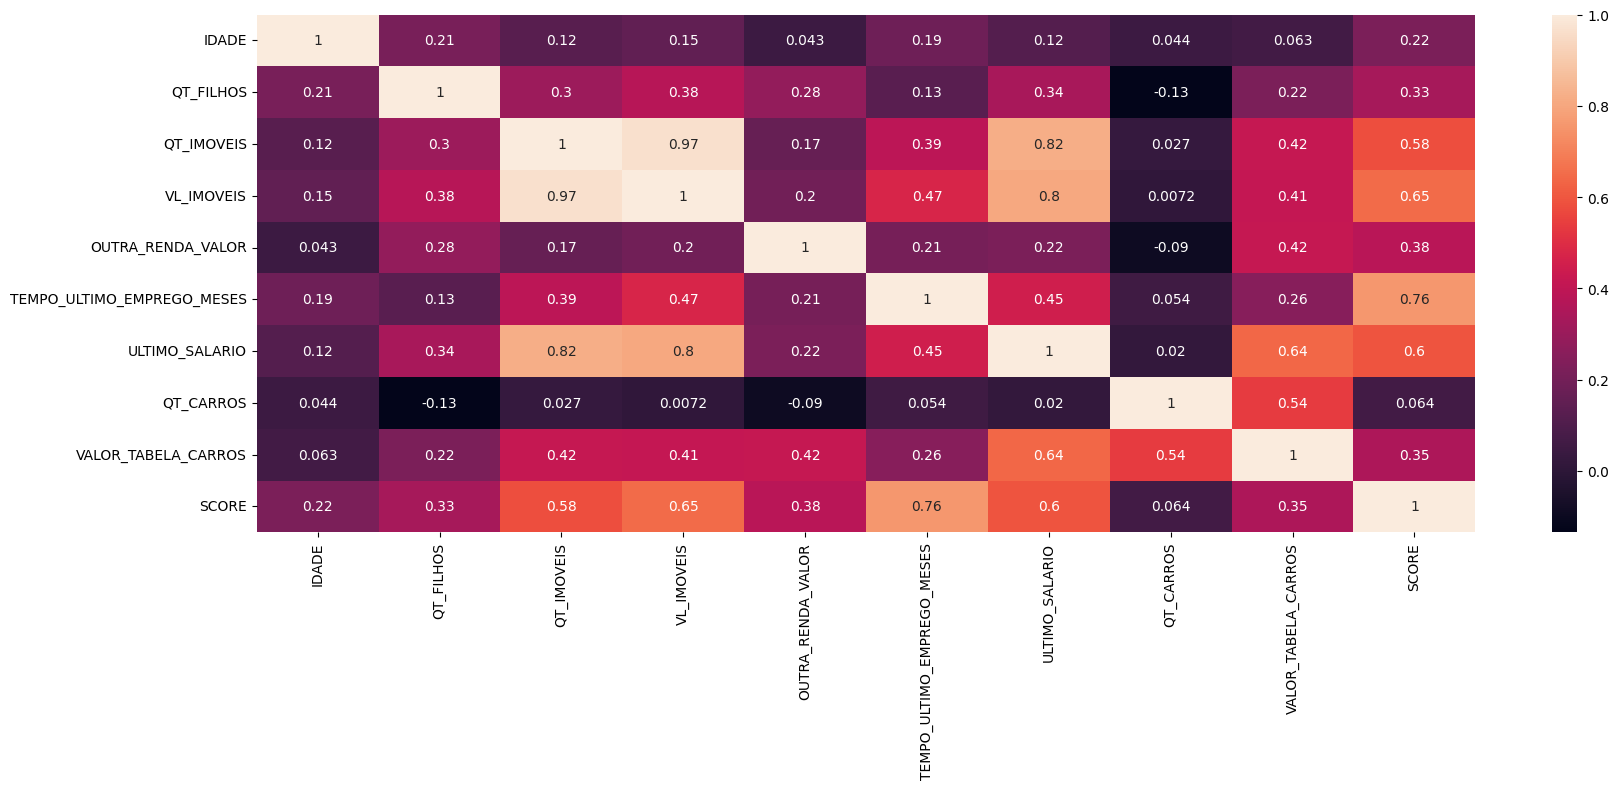

In [30]:
# Através do hitmap podemos observar a correlação entre todas as variáveis
plt.rcParams['figure.figsize']=(18,8)
ax = sns.heatmap(df_dados.corr(), annot=True)

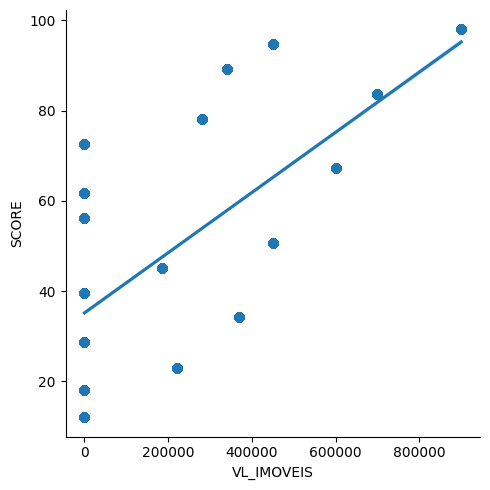

In [31]:
# Vamos observar um gráfico de dispersão para avaliar a correlação de algumas variáveis
sns.lmplot(x = 'VL_IMOVEIS', y='SCORE', data= df_dados);

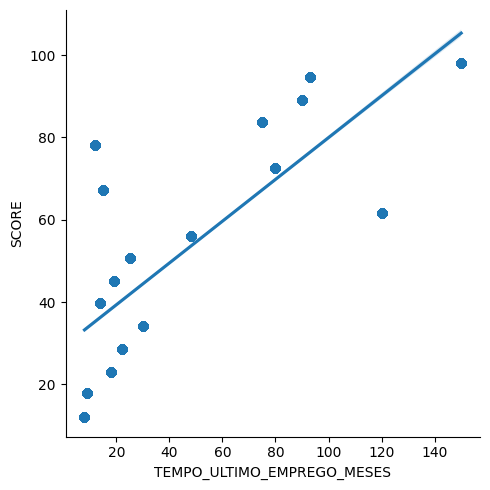

In [32]:
# Vamos observar um gráfico de dispersão para avaliar a correlação de algumas variáveis
sns.lmplot(x = 'TEMPO_ULTIMO_EMPREGO_MESES', y='SCORE', data= df_dados);

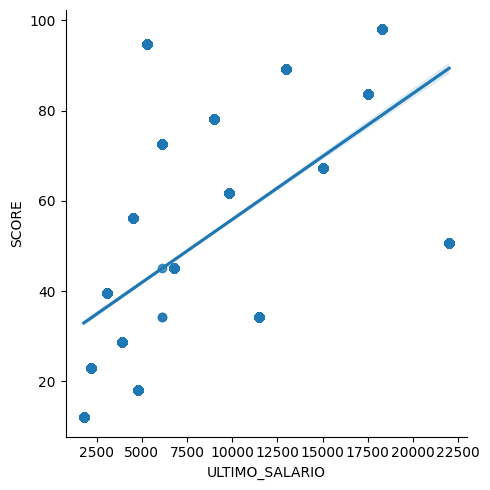

In [33]:
# Vamos observar um gráfico de dispersão para avaliar a correlação de algumas variáveis
sns.lmplot(x = 'ULTIMO_SALARIO', y='SCORE', data= df_dados);

In [34]:
# Vamos fazer uma egenharia de atributos no campo IDADE e criar um novo campo de Faixa Etaria
print('Menor idade', df_dados['IDADE'].min())
print('Maior idade', df_dados['IDADE'].max())

Menor idade 19
Maior idade 65


In [35]:
# Engenharia de atributos - Iremos criar uma nova variável
idade_bins = [0, 30, 40, 50, 60]
idade_categoria = ['Até 30', '31 a 40', '41 a 50', 'Maior que 50']

df_dados['FAIXA_ETARIA'] = pd.cut(df_dados['IDADE'], idade_bins, labels=idade_categoria)
df_dados['FAIXA_ETARIA'].value_counts()

Até 30          3552
Maior que 50    2448
41 a 50         2070
31 a 40         1270
Name: FAIXA_ETARIA, dtype: int64

In [36]:
# Agora iremos avaliar a média do score pela faixa etaria
df_dados.groupby(['FAIXA_ETARIA']).mean()['SCORE']

FAIXA_ETARIA
Até 30          44.762950
31 a 40         48.883202
41 a 50         51.440177
Maior que 50    56.123775
Name: SCORE, dtype: float64

In [37]:
variaveis_categoricas = []
for i in df_dados.columns[0:17].tolist():
  if df_dados.dtypes[i] =='object' or df_dados.dtypes[i] =='category':
    print(i, ';' , df_dados.dtypes[i])
    variaveis_categoricas.append(i)

UF ; object
ESCOLARIDADE ; object
ESTADO_CIVIL ; object
CASA_PROPRIA ; object
OUTRA_RENDA ; object
TRABALHANDO_ATUALMENTE ; object
FAIXA_ETARIA ; category


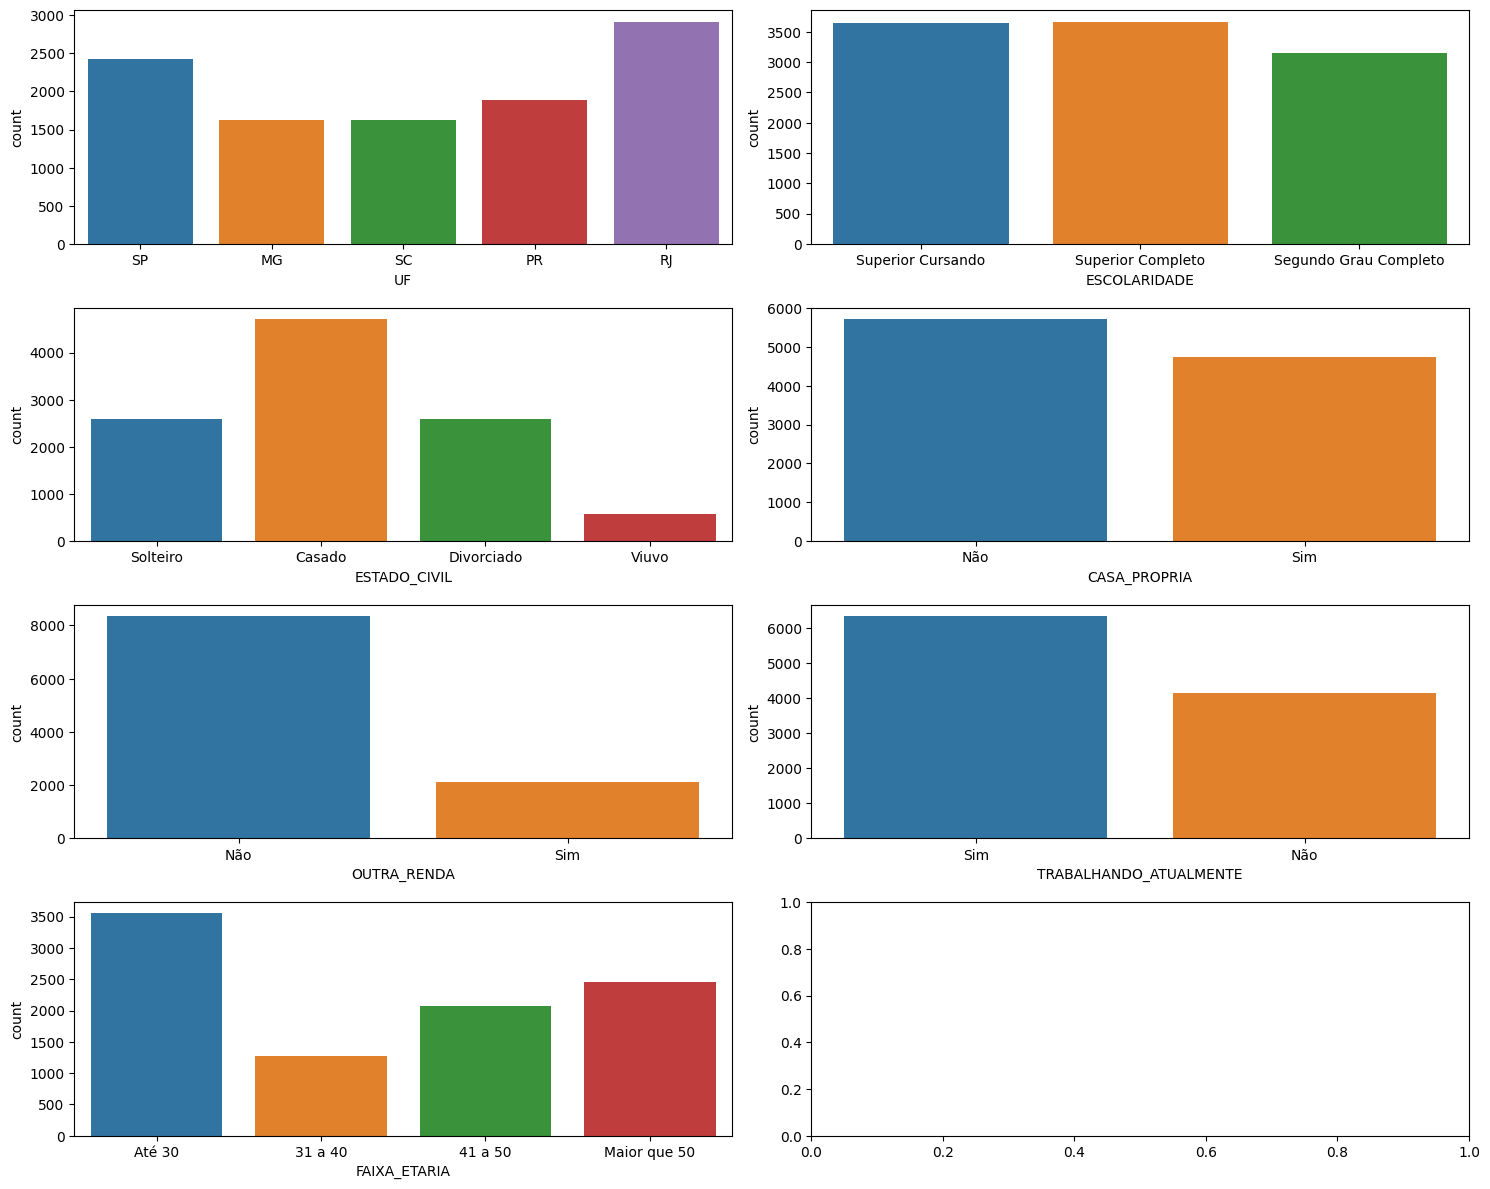

In [38]:
#Iremos exibir todos os gráficos de todas colunas de uma só vez
# Aqui definimos os tamanhos dos gráficos
plt.rcParams["figure.figsize"] = [15.00, 12.00]
plt.rcParams["figure.autolayout"] = True

#Definiremos as quantidades de linhas e colunas que exibiremos o gráfico
f, axes = plt.subplots(4, 2)

linha = 0
coluna = 0

for i in variaveis_categoricas:
  sns.countplot(data = df_dados, x=i, ax=axes[linha][coluna])
  coluna += 1
  if coluna ==2:
    linha += 1
    coluna = 0

plt.show()

## **Pré Processamento dos Dados**

In [39]:
#Criar o encoder
lb = LabelEncoder()

# Aplica o encoder nas variáveis que estão com string
df_dados['FAIXA_ETARIA'] = lb.fit_transform(df_dados['FAIXA_ETARIA'])
df_dados['OUTRA_RENDA'] = lb.fit_transform(df_dados['OUTRA_RENDA'])
df_dados['TRABALHANDO_ATUALMENTE'] = lb.fit_transform(df_dados['TRABALHANDO_ATUALMENTE'])
df_dados['ESTADO_CIVIL'] = lb.fit_transform(df_dados['ESTADO_CIVIL'])
df_dados['CASA_PROPRIA'] = lb.fit_transform(df_dados['CASA_PROPRIA'])
df_dados['ESCOLARIDADE'] = lb.fit_transform(df_dados['ESCOLARIDADE'])
df_dados['UF'] = lb.fit_transform(df_dados['UF'])

# Remove valores missing eventualmente gerados
df_dados.dropna(inplace=True)

In [ ]:
df_dados.head(50)

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE,FAIXA_ETARIA
0,4,19,2,2,0,0,0,0,0,0,8,1,1800.0,0,0,12.000000,2
1,0,23,1,2,1,0,0,0,0,0,9,0,4800.0,1,50000,18.000000,2
2,3,25,0,0,0,1,1,220000,0,0,18,1,2200.0,2,30000,23.000000,2
3,1,27,2,0,1,1,0,0,0,0,22,0,3900.0,0,0,28.666667,2
4,2,28,1,1,2,0,1,370000,0,0,30,1,6100.0,1,35000,34.166667,2
5,4,30,0,1,0,0,0,0,0,0,14,1,3100.0,2,40000,39.666667,2
6,0,32,2,2,1,1,1,185000,1,3000,19,1,6800.0,0,0,45.166667,0
7,3,35,1,2,1,1,2,450000,1,2400,25,1,22000.0,1,150000,50.666667,0
8,1,42,0,0,0,0,0,0,0,0,48,1,4500.0,2,28000,56.166667,1
9,2,45,2,0,0,0,0,0,0,0,120,0,9800.0,0,0,61.666667,1


In [41]:
# Agora vemos que todas variáveis são númericas devido ao parametrização do LabelEncoder
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10474 entries, 0 to 10475
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   UF                          10474 non-null  int64  
 1   IDADE                       10474 non-null  int64  
 2   ESCOLARIDADE                10474 non-null  int64  
 3   ESTADO_CIVIL                10474 non-null  int64  
 4   QT_FILHOS                   10474 non-null  int64  
 5   CASA_PROPRIA                10474 non-null  int64  
 6   QT_IMOVEIS                  10474 non-null  int64  
 7   VL_IMOVEIS                  10474 non-null  int64  
 8   OUTRA_RENDA                 10474 non-null  int64  
 9   OUTRA_RENDA_VALOR           10474 non-null  int64  
 10  TEMPO_ULTIMO_EMPREGO_MESES  10474 non-null  int64  
 11  TRABALHANDO_ATUALMENTE      10474 non-null  int64  
 12  ULTIMO_SALARIO              10474 non-null  float64
 13  QT_CARROS                   104

In [43]:
#Separando a variável do alvo
target = df_dados.iloc[:,15:16]

In [45]:
# Separando as variáveis preditoras
preditoras = df_dados.copy() # Cópia do DataFrame
del preditoras['SCORE'] # Excluindo a variável targe, pois separamos ela na eta anterior
preditoras.head() # Vizualizando

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,FAIXA_ETARIA
0,4,19,2,2,0,0,0,0,0,0,8,1,1800.0,0,0,2
1,0,23,1,2,1,0,0,0,0,0,9,0,4800.0,1,50000,2
2,3,25,0,0,0,1,1,220000,0,0,18,1,2200.0,2,30000,2
3,1,27,2,0,1,1,0,0,0,0,22,0,3900.0,0,0,2
4,2,28,1,1,2,0,1,370000,0,0,30,1,6100.0,1,35000,2


In [46]:
# Divisão TREINO e TESTE
X_treino, X_teste, Y_treino, Y_teste = train_test_split(preditoras, target, test_size =0.3, random_state= 40)

In [47]:
# Vamos normalizar treino e teste
# Padronização
sc = MinMaxScaler()
X_treino_normalizados = sc.fit_transform(X_treino)
X_teste_normalizados = sc.transform(X_teste)


## **Avaliar e testar o modelo preditivo**




In [53]:
#Treina o modelo
modelo = LinearRegression()
#Modelo_v2 = modelo.fit(X_treino_scaled, y_treino)
modelo = modelo.fit(X_treino_normalizados, Y_treino)

In [54]:
r2_score(Y_teste, modelo.fit(X_treino_normalizados, Y_treino).predict(X_teste_normalizados))

0.7984013631162861

In [57]:
# (simulação) Isso em produção poderia ser dessa forma ou carregado em uma API :

UF = 2
IDADE = 30
ESCOLARIDADE = 1
ESTADO_CIVIL = 2
QT_FILHOS = 3
CASA_PROPRIA = 1
QT_IMOVEIS = 4
VL_IMOVEIS = 700000
OUTRA_RENDA = 1
OUTRA_RENDA_VALOR = 3500
TEMPO_ULTIMO_EMPREGO_MESES = 15
TRABALHANDO_ATUALMENTE = 1
ULTIMO_SALARIO = 12000
QT_CARROS = 2
VALOR_TABELA_CARROS = 105000
FAIXA_ETARIA = 3

nv_dados = [UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,
OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS
,FAIXA_ETARIA ]

#Reshape
x = np.array(nv_dados).reshape(1, -1)
x = sc.transform(x)

#Previsão

print('Score de crédito previsto para esse cliente é de: ', modelo.predict(x))


Score de crédito previsto para esse cliente é de:  [[67.00577713]]
